*  **Using to Optimize Space Management**

## **Random Forest Model**

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load training data
training_data = pd.read_csv("/content/datatraining.txt")
print(training_data.head())

                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  


In [35]:
# Load test data
test_data = pd.read_csv("/content/datatest.txt")
print(test_data.head())

                    date  Temperature  Humidity       Light         CO2  \
140  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
141  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
142  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
143  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
144  2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

     HumidityRatio  Occupancy  
140       0.004764          1  
141       0.004773          1  
142       0.004765          1  
143       0.004744          1  
144       0.004767          1  


In [36]:
# Load validation data
validation_data = pd.read_csv("/content/datatest2.txt")
print(validation_data.head())

                  date  Temperature   Humidity       Light          CO2  \
1  2015-02-11 14:48:00      21.7600  31.133333  437.333333  1029.666667   
2  2015-02-11 14:49:00      21.7900  31.000000  437.333333  1000.000000   
3  2015-02-11 14:50:00      21.7675  31.122500  434.000000  1003.750000   
4  2015-02-11 14:51:00      21.7675  31.122500  439.000000  1009.500000   
5  2015-02-11 14:51:59      21.7900  31.133333  437.333333  1005.666667   

   HumidityRatio  Occupancy  
1       0.005021          1  
2       0.005009          1  
3       0.005022          1  
4       0.005022          1  
5       0.005030          1  


In [37]:
# Load training data
training_data = pd.read_csv("datatraining.txt")

# Load test data
test_data = pd.read_csv("datatest.txt")

# Load validation data
validation_data = pd.read_csv("datatest2.txt")

# Preprocess data (e.g., drop timestamp and humidity ratio)
X_train = training_data.drop(columns=["date", "HumidityRatio", "Occupancy"])
y_train = training_data["Occupancy"]

X_test = test_data.drop(columns=["date", "HumidityRatio", "Occupancy"])
y_test = test_data["Occupancy"]

X_val = validation_data.drop(columns=["date", "HumidityRatio", "Occupancy"])
y_val = validation_data["Occupancy"]

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

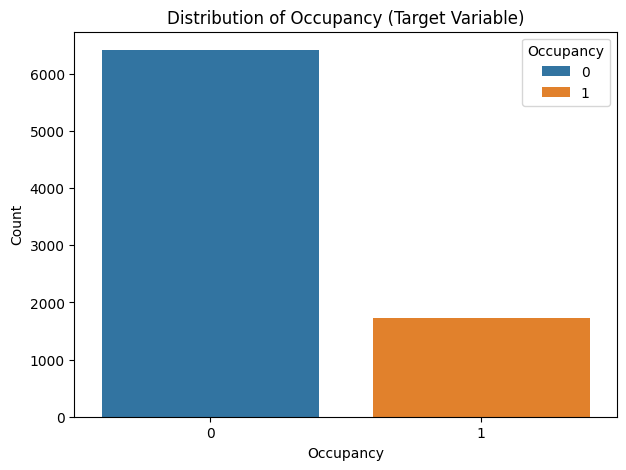

In [38]:
# Occupancy distribution

plt.figure(figsize=(7, 5))
sns.countplot(x='Occupancy', data=training_data, hue='Occupancy')
plt.title('Distribution of Occupancy (Target Variable)')
plt.xlabel('Occupancy')
plt.ylabel('Count')
plt.show()

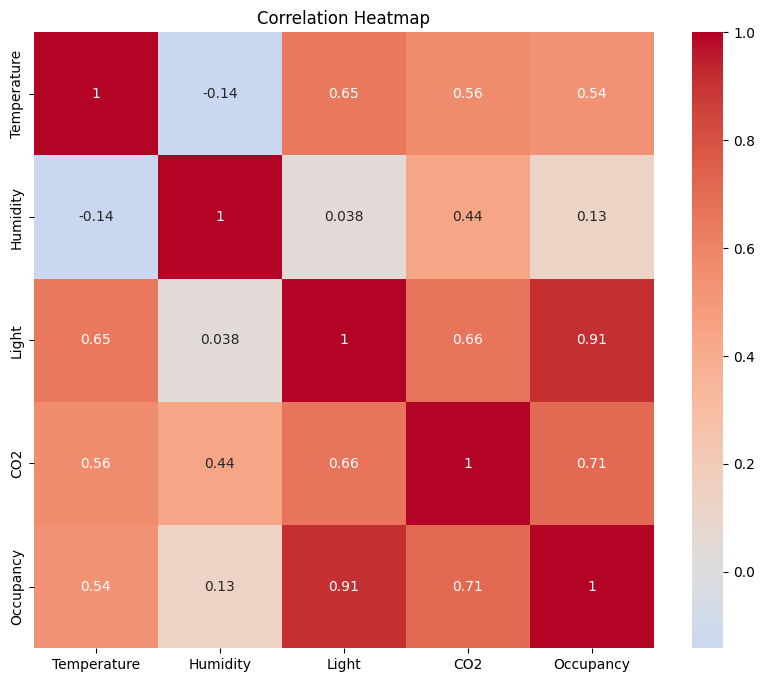

In [39]:
# Correlation matrix

plt.figure(figsize=(10, 8))
corr_matrix = training_data.drop(columns=['date', 'HumidityRatio']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

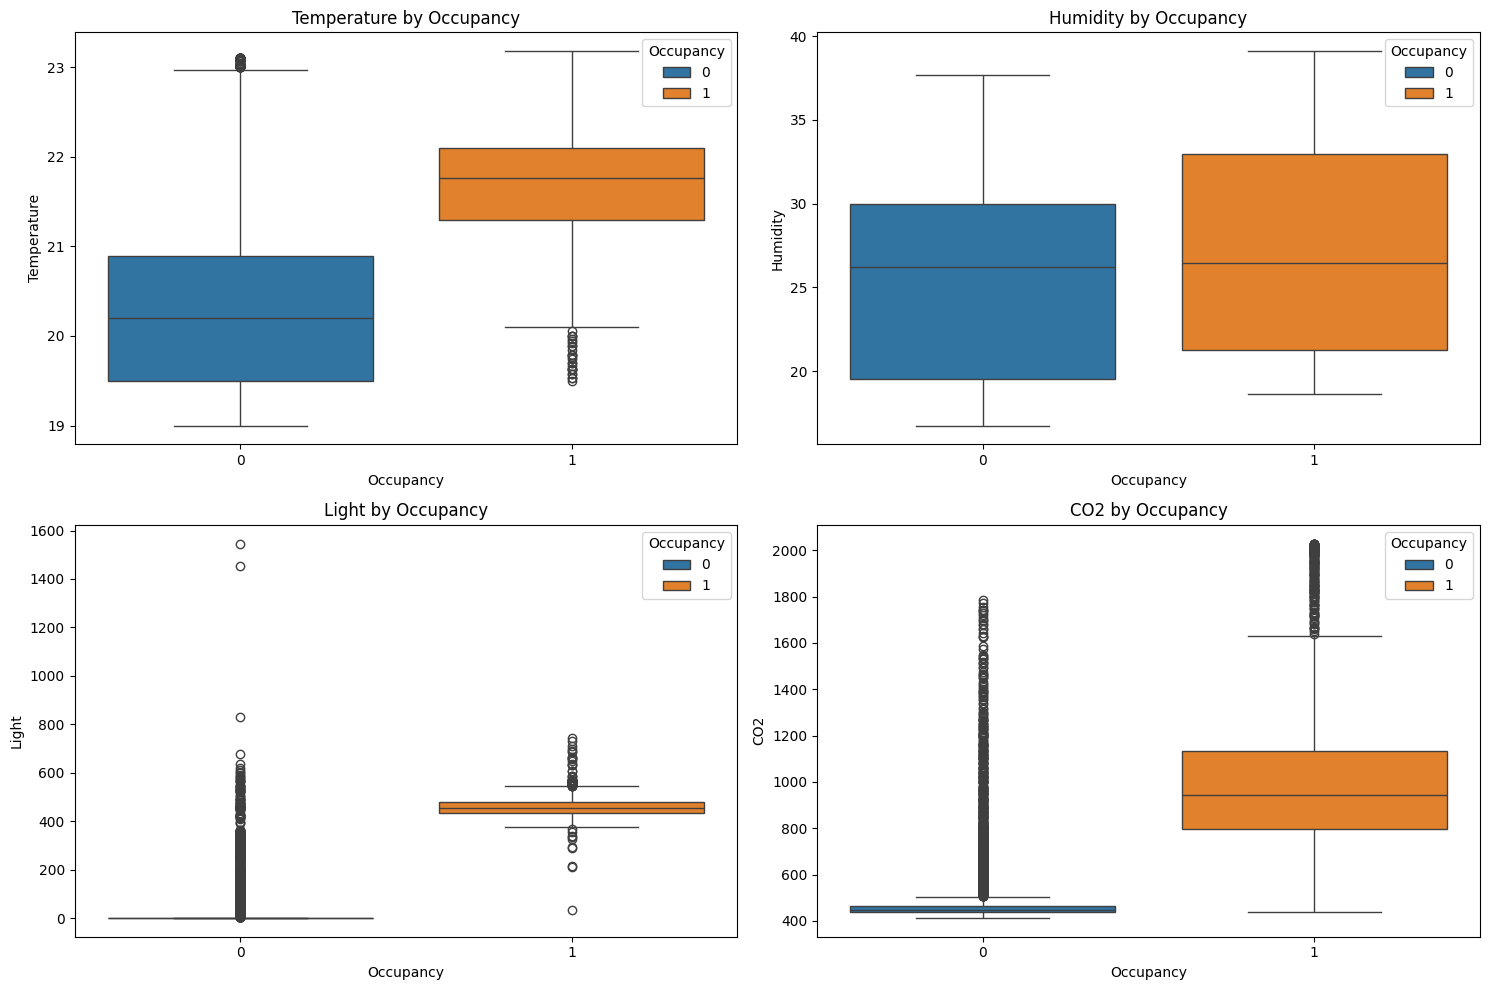

In [40]:
# Plot distributions of each feature by occupancy

features = ['Temperature', 'Humidity', 'Light', 'CO2']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Occupancy', y=feature, data=training_data,hue='Occupancy')
    plt.title(f'{feature} by Occupancy')
plt.tight_layout()
plt.show()

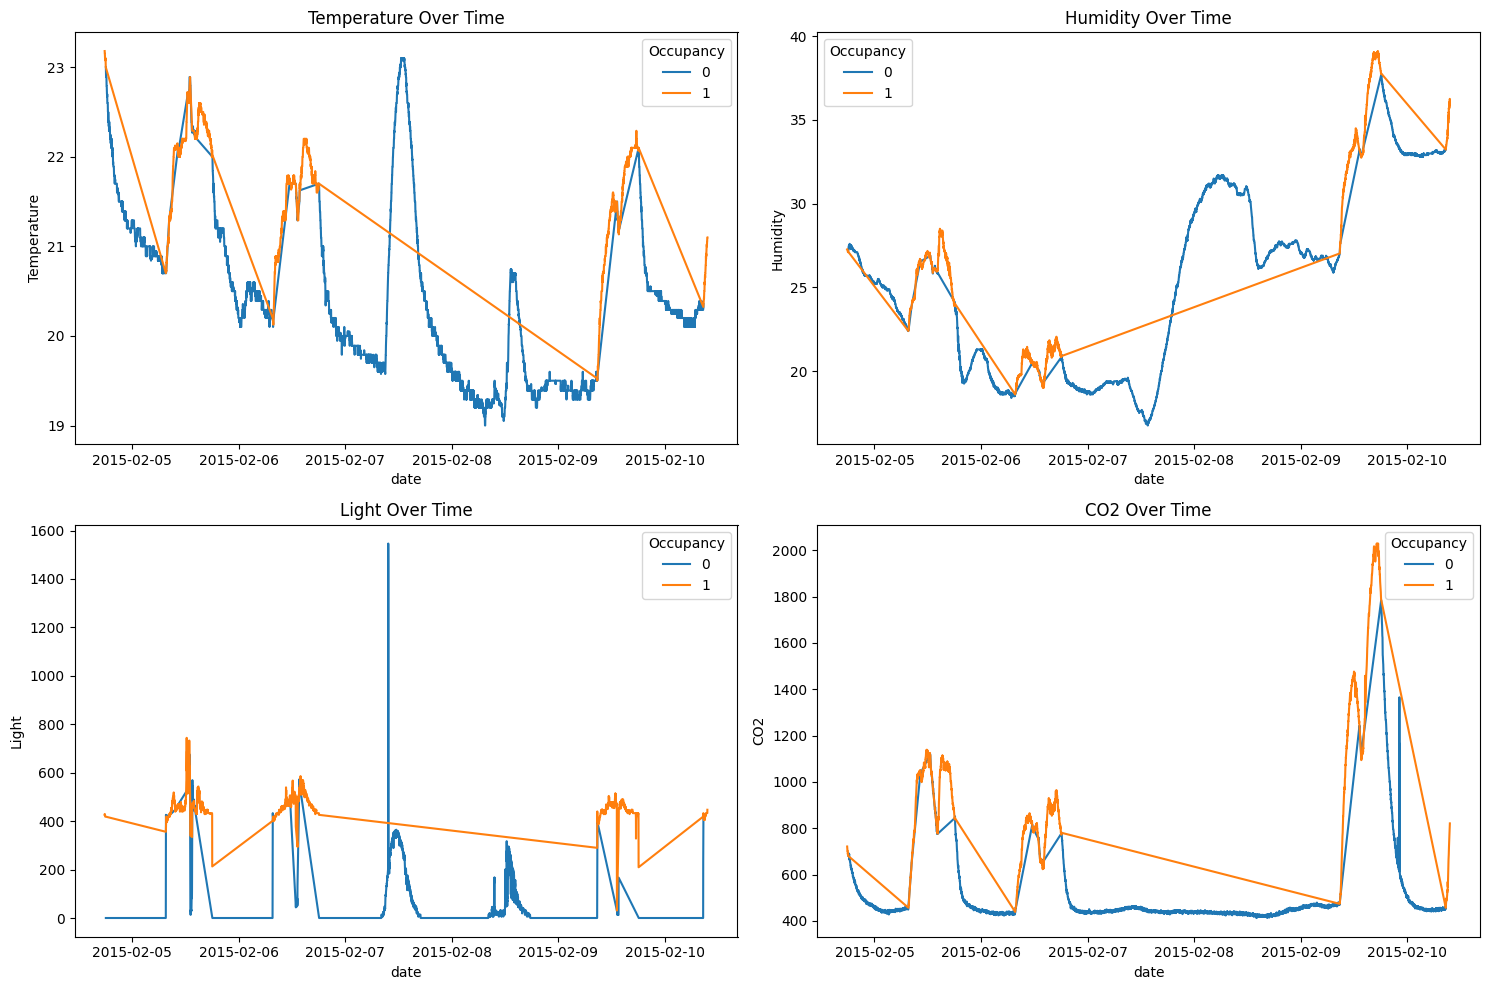

In [41]:
# Convert date to datetime
training_data['date'] = pd.to_datetime(training_data['date'])

# Plot time series
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.lineplot(x='date', y='Temperature', hue='Occupancy', data=training_data)
plt.title('Temperature Over Time')

plt.subplot(2, 2, 2)
sns.lineplot(x='date', y='Humidity', hue='Occupancy', data=training_data)
plt.title('Humidity Over Time')

plt.subplot(2, 2, 3)
sns.lineplot(x='date', y='Light', hue='Occupancy', data=training_data)
plt.title('Light Over Time')

plt.subplot(2, 2, 4)
sns.lineplot(x='date', y='CO2', hue='Occupancy', data=training_data)
plt.title('CO2 Over Time')

plt.tight_layout()
plt.show()

In [43]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Occupied", "Occupied"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9463
Precision: 0.9452
Recall: 0.9053

Classification Report:
              precision    recall  f1-score   support

Not Occupied       0.95      0.97      0.96      1693
    Occupied       0.95      0.91      0.92       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.94      2665
weighted avg       0.95      0.95      0.95      2665


Confusion Matrix:
[[1642   51]
 [  92  880]]


<ipython-input-46-3de804ae3b7f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


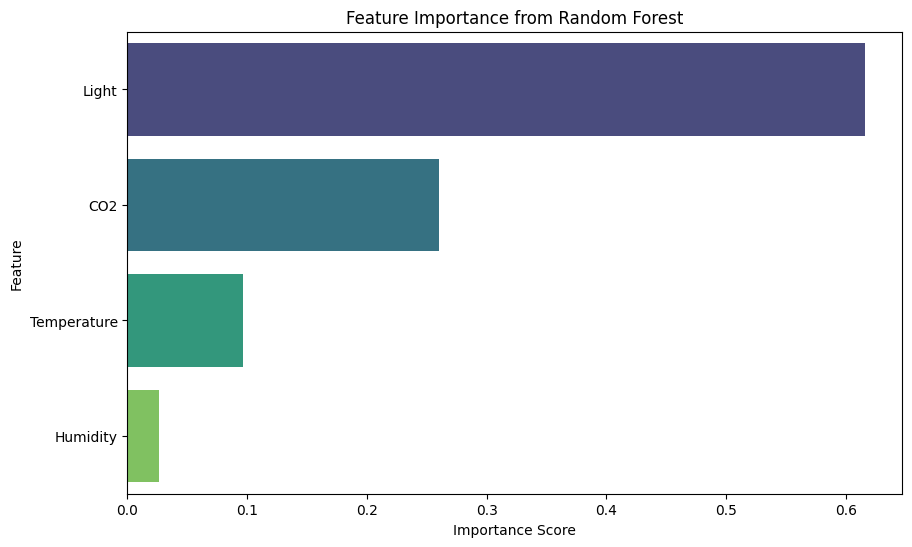

In [46]:
# Enhanced feature importance plot

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

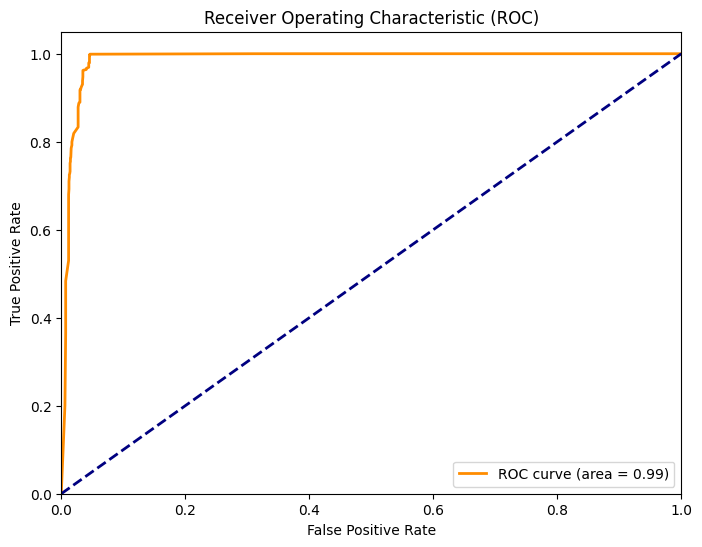

In [45]:
# Get predicted probabilities

y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

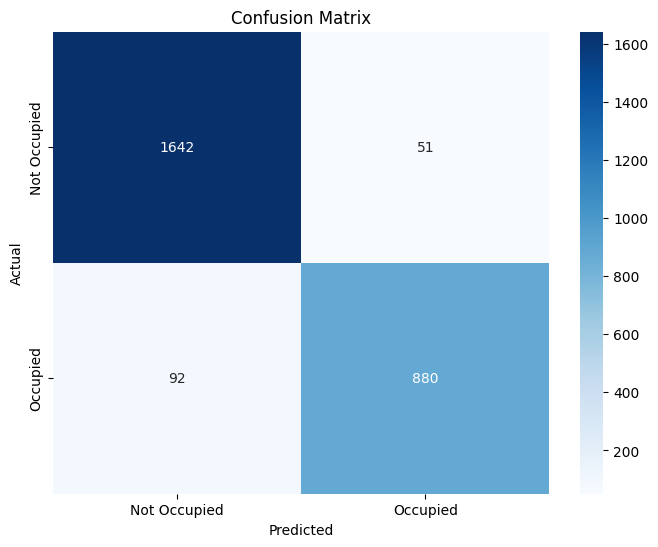

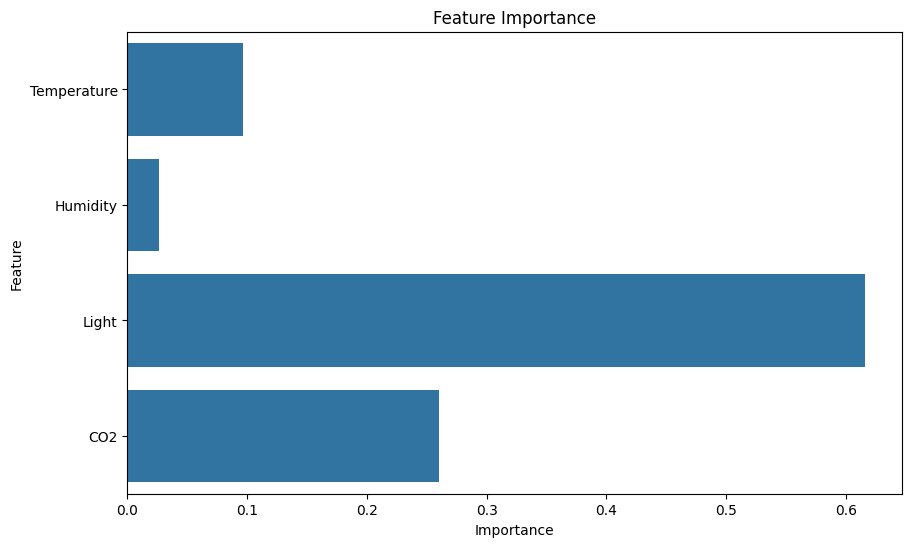

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Occupied", "Occupied"],
            yticklabels=["Not Occupied", "Occupied"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("\n\n")
# Plot feature importance (if using Random Forest)
feature_importance = model.feature_importances_
features = training_data.drop(columns=["date", "HumidityRatio", "Occupancy"]).columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, "occupancy_model.h5")
print("✅ Occupancy model saved as occupancy_model.h5")
